In [24]:
from google.colab import files
uploaded=files.upload()

Saving car data.csv to car data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



Data Collection and Preprocessing


In [25]:
car=pd.read_csv("car data.csv")

In [5]:
car.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [7]:
car.shape

(4340, 8)

In [8]:
car.info()
#as we can see no values missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
#checking the ditribution of categorical data
print(car.fuel.value_counts())
print(car.seller_type.value_counts())
print(car.transmission.value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64
Manual       3892
Automatic     448
Name: transmission, dtype: int64


In [27]:
#encoding for model to understand cate->numer
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [29]:
x=car.drop(['Car_Name','Selling_Price','Owner'],axis=1)
#whenever we write axis=1 we are dropping a column
#whenever we are writing axis=0 we are dropping a row
y=car['Selling_Price']

In [12]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Model Training

In [31]:
lin_reg=LinearRegression()


In [32]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [33]:
training=lin_reg.predict(x_train)

In [34]:
#r^2 error
error_score=metrics.r2_score(y_train,training)
error_score

0.8771696354074824

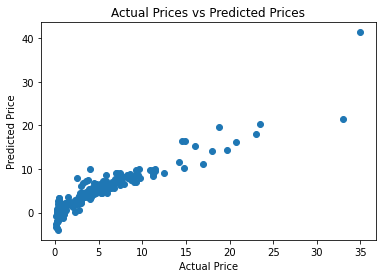

In [35]:
#visualize actual price an predicted prices
plt.scatter(y_train,training)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()